<a href="https://colab.research.google.com/github/Apeksha-Jain11/Road_segmentation/blob/main/Road_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from PIL import Image
import cv2
cv2.__version__
from tensorflow.keras import callbacks
import numpy as np
import tensorflow as tf
from patchify import patchify # Library to create patches from input image
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random


In [ ]:
data_dir = '/content/drive/My Drive/road_segemenatation_ideal/'
train_data_path = '/content/drive/MyDrive/road_segmentation_ideal/training/input/'
train_label_path = '/content/drive/MyDrive/road_segmentation_ideal/training/output/'

#train_data_path = os.path.join(data_dir+'training/input/img-1.png')
#print(train_data_path)
# image= cv2.imread('/content/drive/MyDrive/road_segmentation_ideal/training/input/img-1.png')
# plt.imshow(image[:,:,0])
# label = cv2.imread('/content/drive/MyDrive/road_segmentation_ideal/training/output/img-10.png')
# labels_num = np.unique(label[:,:,1])
# print(labels_num)

In [ ]:
#Creating 256*256 patches using patchify for training data
patch_size= 256
images_train_data = os.listdir(train_data_path)
image_train_label = os.listdir(train_label_path)
patches= os.listdir(train_data_path+'256_patches')
for idx ,image_name in enumerate(image_train_label):
    
    print(train_data_path+"/"+image_name)
    
    image= cv2.imread(train_data_path+"/"+image_name,1)
    if image is None:
      continue
    
    size_X= (image.shape[0]//patch_size)*patch_size  # Calcualte the nearest number divisible by 256 to crop image
    size_Y= (image.shape[1]//patch_size)*patch_size
    image = Image.fromarray(image)
    image = image.crop((0,0,size_X,size_Y))  # Croping image to 1280*1280
    image = np.array(image)
    patches_image = patchify(image,(256,256,3),step=256)
  # print(patches_image)
    for i in range(patches_image.shape[0]):
      for j in range(patches_image.shape[1]):
          
          single_patch_img = patches_image[i,j,:,:]
          #single_patch_img = (single_patch_img.astype('float32')) / 255. #We will preprocess using one of the backbones
          single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
          new_image_name=train_data_path+"256_patches/"+image_name.split('.')[0]+"_patch_"+str(i)+str(j)+".png"
          
          cv2.imwrite(new_image_name, single_patch_img)
          #image_dataset.append(single_patch_img)



     

     


In [ ]:
#Creating 256*256 patches using patchify for label
patch_size= 256
images_train_data = os.listdir(train_data_path)
image_train_label = os.listdir(train_label_path)
patches= os.listdir(train_data_path+'training_data/256_patches')
for idx ,image_name in enumerate(image_train_label):
    
    print(train_data_path+"/"+image_name)
    
    image= cv2.imread(train_label_path+"/"+image_name,1)
    image_data=cv2.imread(train_data_path+"/"+image_name,1)
    if image_data is None:
        continue      
    size_X= (image.shape[0]//patch_size)*patch_size
    size_Y= (image.shape[1]//patch_size)*patch_size
    image = Image.fromarray(image)
    image = image.crop((0,0,size_X,size_Y))
    image = np.array(image)
    patches_image = patchify(image,(256,256,1),step=256)
    #print(patches_image.shape)
    for i in range(patches_image.shape[0]):
      for j in range(patches_image.shape[1]):
          
          single_patch_img = patches_image[i,j,:,:]
          print(single_patch_img.shape)
          single_patch_img = single_patch_img[0][:,:,0] #Drop the extra unecessary dimension that patchify adds.                               
          new_image_name=train_data_path+"training_data/256_patches_label/"+image_name.split('.')[0]+"_patch_"+str(i)+str(j)+".png"
          print(new_image_name)
        
          cv2.imwrite(new_image_name, single_patch_img)
          #image_dataset.append(single_patch_img)


In [ ]:
patches= os.listdir(train_data_path+'training_data/256_patches')
print(len(patches))
#print(len(images_train_data))
#print(patches_image.shape)
#print(len(image_train_label))
patches_label= os.listdir(train_data_path+'training_data/256_patches_label')
print(len(patches_label))

19175
19175


['img-977_patch_00.png', 'img-977_patch_01.png', 'img-977_patch_02.png', 'img-977_patch_03.png', 'img-977_patch_04.png', 'img-977_patch_10.png', 'img-977_patch_11.png', 'img-977_patch_12.png', 'img-977_patch_13.png', 'img-977_patch_14.png', 'img-977_patch_20.png', 'img-977_patch_21.png', 'img-977_patch_22.png', 'img-977_patch_23.png', 'img-977_patch_24.png', 'img-977_patch_30.png', 'img-977_patch_31.png', 'img-977_patch_32.png', 'img-977_patch_33.png', 'img-977_patch_34.png', 'img-977_patch_40.png', 'img-977_patch_41.png', 'img-977_patch_42.png', 'img-977_patch_43.png', 'img-977_patch_44.png', 'img-984_patch_00.png', 'img-984_patch_01.png', 'img-984_patch_02.png', 'img-984_patch_03.png', 'img-984_patch_04.png', 'img-984_patch_10.png', 'img-984_patch_11.png', 'img-984_patch_12.png', 'img-984_patch_13.png', 'img-984_patch_14.png', 'img-984_patch_20.png', 'img-984_patch_21.png', 'img-984_patch_22.png', 'img-984_patch_23.png', 'img-984_patch_24.png', 'img-984_patch_30.png', 'img-984_patch_

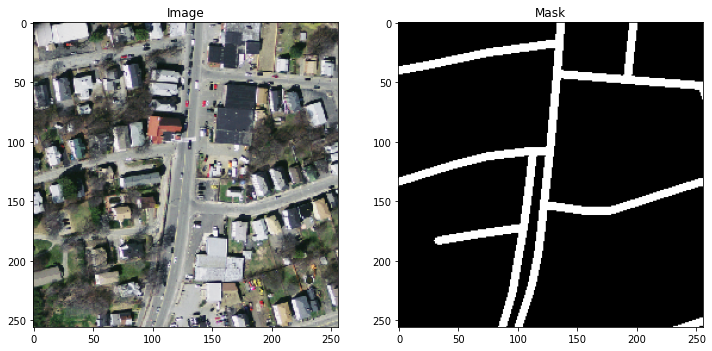

In [ ]:

#Sanity check for images and label correspondence
train_img_dir = "/content/drive/MyDrive/road_segmentation_ideal/training/input/training_data/256_patches/"
train_mask_dir = "/content/drive/MyDrive/road_segmentation_ideal/training/input/training_data/256_patches_label/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)
print(img_list)
print(msk_list)


num_images = len(os.listdir(train_img_dir))


img_num = random.randint(0, num_images-1)
print(img_num)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
print(train_img_dir+img_list[img_num])
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+img_list[img_num], 0)
print(train_mask_dir+msk_list[img_num])

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()


In [ ]:
# Train and test split
import splitfolders  

input_folder = '/content/drive/MyDrive/road_segmentation_ideal/training/input/training_data/'
output_folder = '/content/drive/MyDrive/road_segmentation_ideal/training/input/training_testing_data/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 38350 files [12:32, 50.99 files/s]


In [ ]:
%pip install patchify
%pip install -U segmentation-models
%pip install split-folders